# import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset

In [2]:
df = pd.read_csv("../../datasets/titanic3.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# cleansing

## drop unused columns

In [3]:
df.drop(labels=['ticket','body','home.dest','cabin','boat','embarked','fare','name'], axis=1, inplace=True)

In [4]:
df.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.0000,0,0
1,1,1,male,0.9167,1,2
2,1,0,female,2.0000,1,2
3,1,0,male,30.0000,1,2
4,1,0,female,25.0000,1,2


## fill null value

In [5]:
df.fillna({'age':df.age.mean()}, inplace=True)

In [6]:
# df.isnull().sum().sum() # check null value count

## pemisahan feature (X) dan target (y)

In [7]:
X = df.drop(labels=['survived'], axis=1)
y = df.survived

X = pd.get_dummies(X, columns=['pclass','sex'])
X

,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male
0,29.000000,0,0,1,0,0,1,0
1,0.916700,1,2,1,0,0,0,1
2,2.000000,1,2,1,0,0,1,0
3,30.000000,1,2,1,0,0,0,1
4,25.000000,1,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1304,14.500000,1,0,0,0,1,1,0
1305,29.881135,1,0,0,0,1,1,0
1306,26.500000,0,0,0,0,1,0,1
1307,27.000000,0,0,0,0,1,0,1


## we need scikit learn awokwokwok

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.score(X, y)

0.8571428571428571

## data splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1047, 8), (262, 8), (1047,), (262,))

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.score(X_test, y_test), knn.score(X_train, y_train)

(0.7175572519083969, 0.8710601719197708)

### data splitting ga cukup. harus nambah k-fold cross validation

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=4).mean()

0.6608418177071679

### improve data : scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [24]:
scaler.data_min_, scaler.data_max_

(array([0.3333, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]),
 array([80.,  8.,  9.,  1.,  1.,  1.,  1.,  1.]))

In [29]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.8710601719197708, 0.7290076335877863)

## improve model: parameter tuning

### tuning jumlah tetangga tanpa scaling

In [41]:
neighbor = range(1,51,2)
train_score = []
test_score = []
for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))


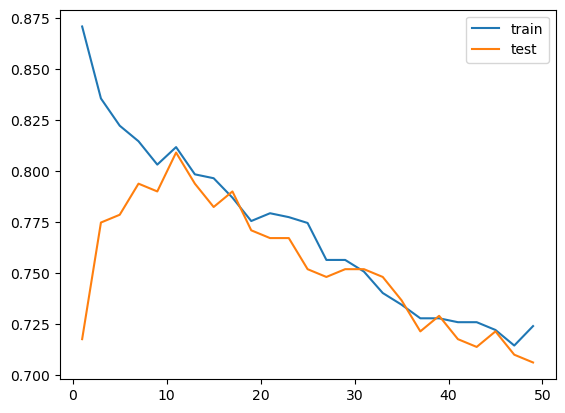

In [45]:
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

In [49]:
print(f"max test score: {np.max(test_score)}")
print(f"neighbor: {neighbor[np.argmax(test_score)]}")

max test score: 0.8091603053435115
neighbor: 11


### tuning tetangga dengan scaling

max test score: 0.8435114503816794
neighbor: 15


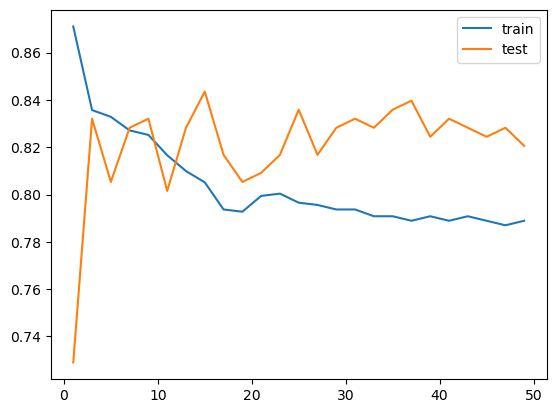

In [56]:
neighbor = range(1,51,2)
train_score = []
test_score = []
for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()
print(f"max test score: {np.max(test_score)}")
print(f"neighbor: {neighbor[np.argmax(test_score)]}")

### tuning dengan weight

In [58]:
# neighbor = range(1,51,2)
# train_score = []
# test_score = []
# for k in neighbor:
#     knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
#     knn.fit(X_train_scaled, y_train)
#     train_score.append(knn.score(X_train_scaled, y_train))
#     test_score.append(knn.score(X_test_scaled, y_test))
    
# plt.plot(neighbor, train_score, label="train")
# plt.plot(neighbor, test_score, label="test")
# plt.legend()
# print(f"max test score: {np.max(test_score)}")
# print(f"neighbor: {neighbor[np.argmax(test_score)]}")

In [57]:
# neighbor = range(1,51,2)
# train_score = []
# test_score = []
# for k in neighbor:
#     knn = KNeighborsClassifier(n_neighbors=k, weights="distance", p=1)
#     knn.fit(X_train_scaled, y_train)
#     train_score.append(knn.score(X_train_scaled, y_train))
#     test_score.append(knn.score(X_test_scaled, y_test))
    
# plt.plot(neighbor, train_score, label="train")
# plt.plot(neighbor, test_score, label="test")
# plt.legend()
# print(f"max test score: {np.max(test_score)}")
# print(f"neighbor: {neighbor[np.argmax(test_score)]}")